In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_digits

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from IPython.display import Image

## Tree and Ensemble Methods

### Live Demos

In [2]:
data = load_iris()

In [3]:
attributes, targets = data["data"], data["target"]

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
tree = DecisionTreeClassifier()

In [6]:
tree.fit(attributes, targets)

DecisionTreeClassifier()

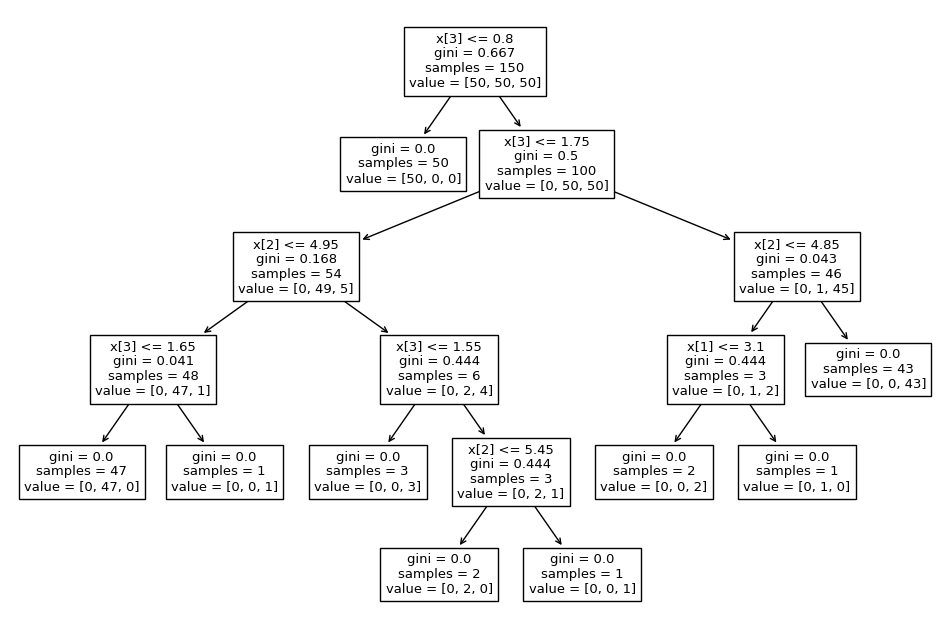

In [7]:
plt.figure(figsize=(12,8))
plot_tree(tree)
plt.show()

In [8]:
tree.tree_.max_depth

5

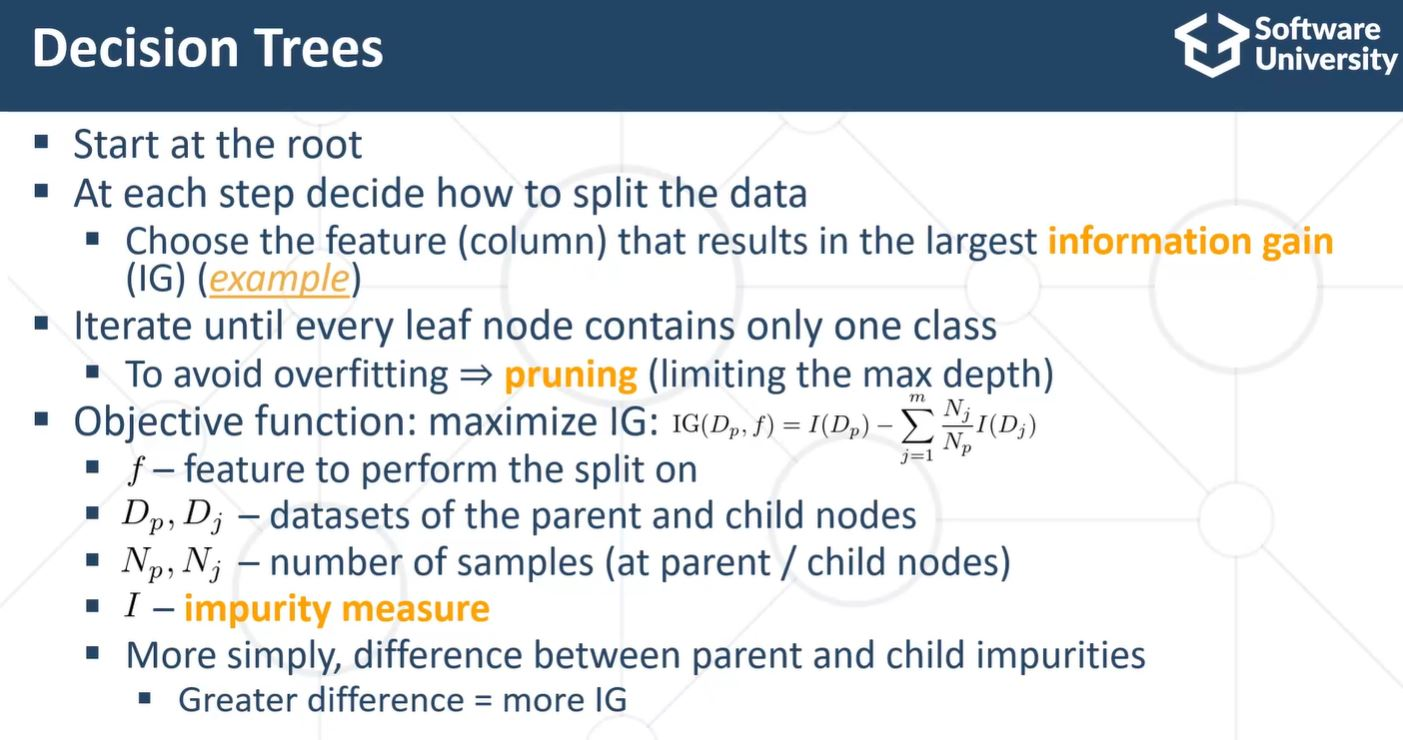

In [9]:
image_path = "images/01.JPG"
Image(filename=image_path)

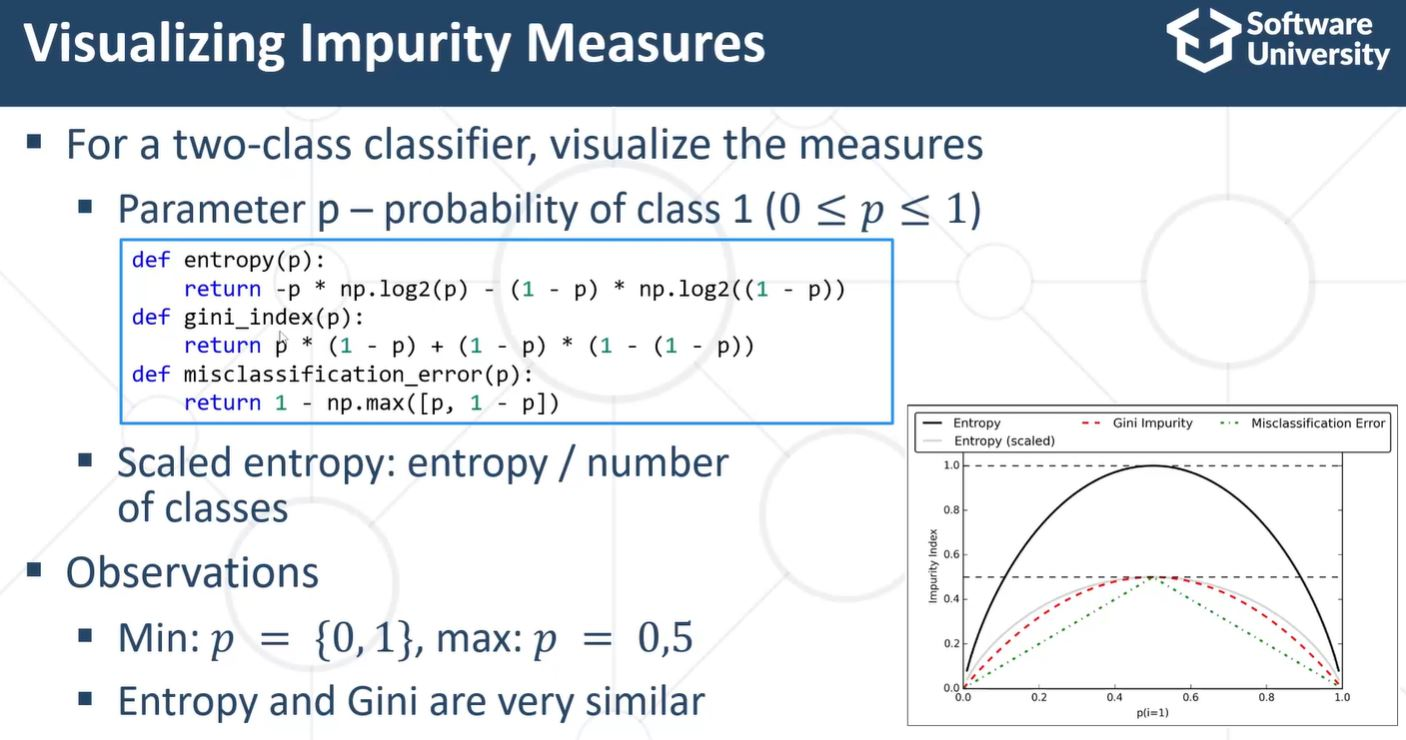

In [10]:
image_path = "images/02.JPG"
Image(filename=image_path)

In [11]:
data = load_digits()

In [12]:
attributes, targets = data["data"], data["target"]

In [13]:
attributes.shape

(1797, 64)

In [14]:
tree = DecisionTreeClassifier()

In [15]:
tree.fit(attributes, targets)

DecisionTreeClassifier()

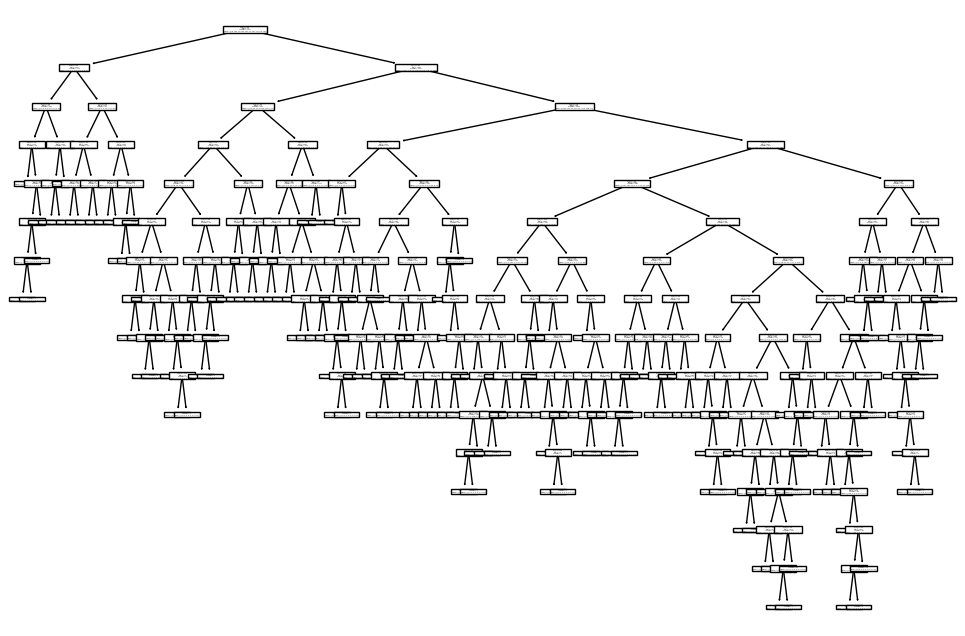

In [16]:
plt.figure(figsize=(12,8))
plot_tree(tree)
plt.show()

In [17]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_53 <= 3.50
|   |   |   |   |--- class: 5
|   |   |   |--- feature_53 >  3.50
|   |   |   |   |--- feature_41 <= 5.50
|   |   |   |   |   |--- feature_61 <= 14.00
|   |   |   |   |   |   |--- feature_37 <= 0.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_37 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_61 >  14.00
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_41 >  5.50
|   |   |   |   |   |--- class: 4
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_63 <= 1.50
|   |   |   |   |--- feature_13 <= 1.00
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_13 >  1.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_63 >  1.50
|   |   |   |   |--- class: 2
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_42 <= 3.50
|   |   |   | 

In [18]:
tree.tree_.max_depth

15

In [19]:
tree = DecisionTreeClassifier(max_depth=4)

In [20]:
tree.fit(attributes, targets)

DecisionTreeClassifier(max_depth=4)

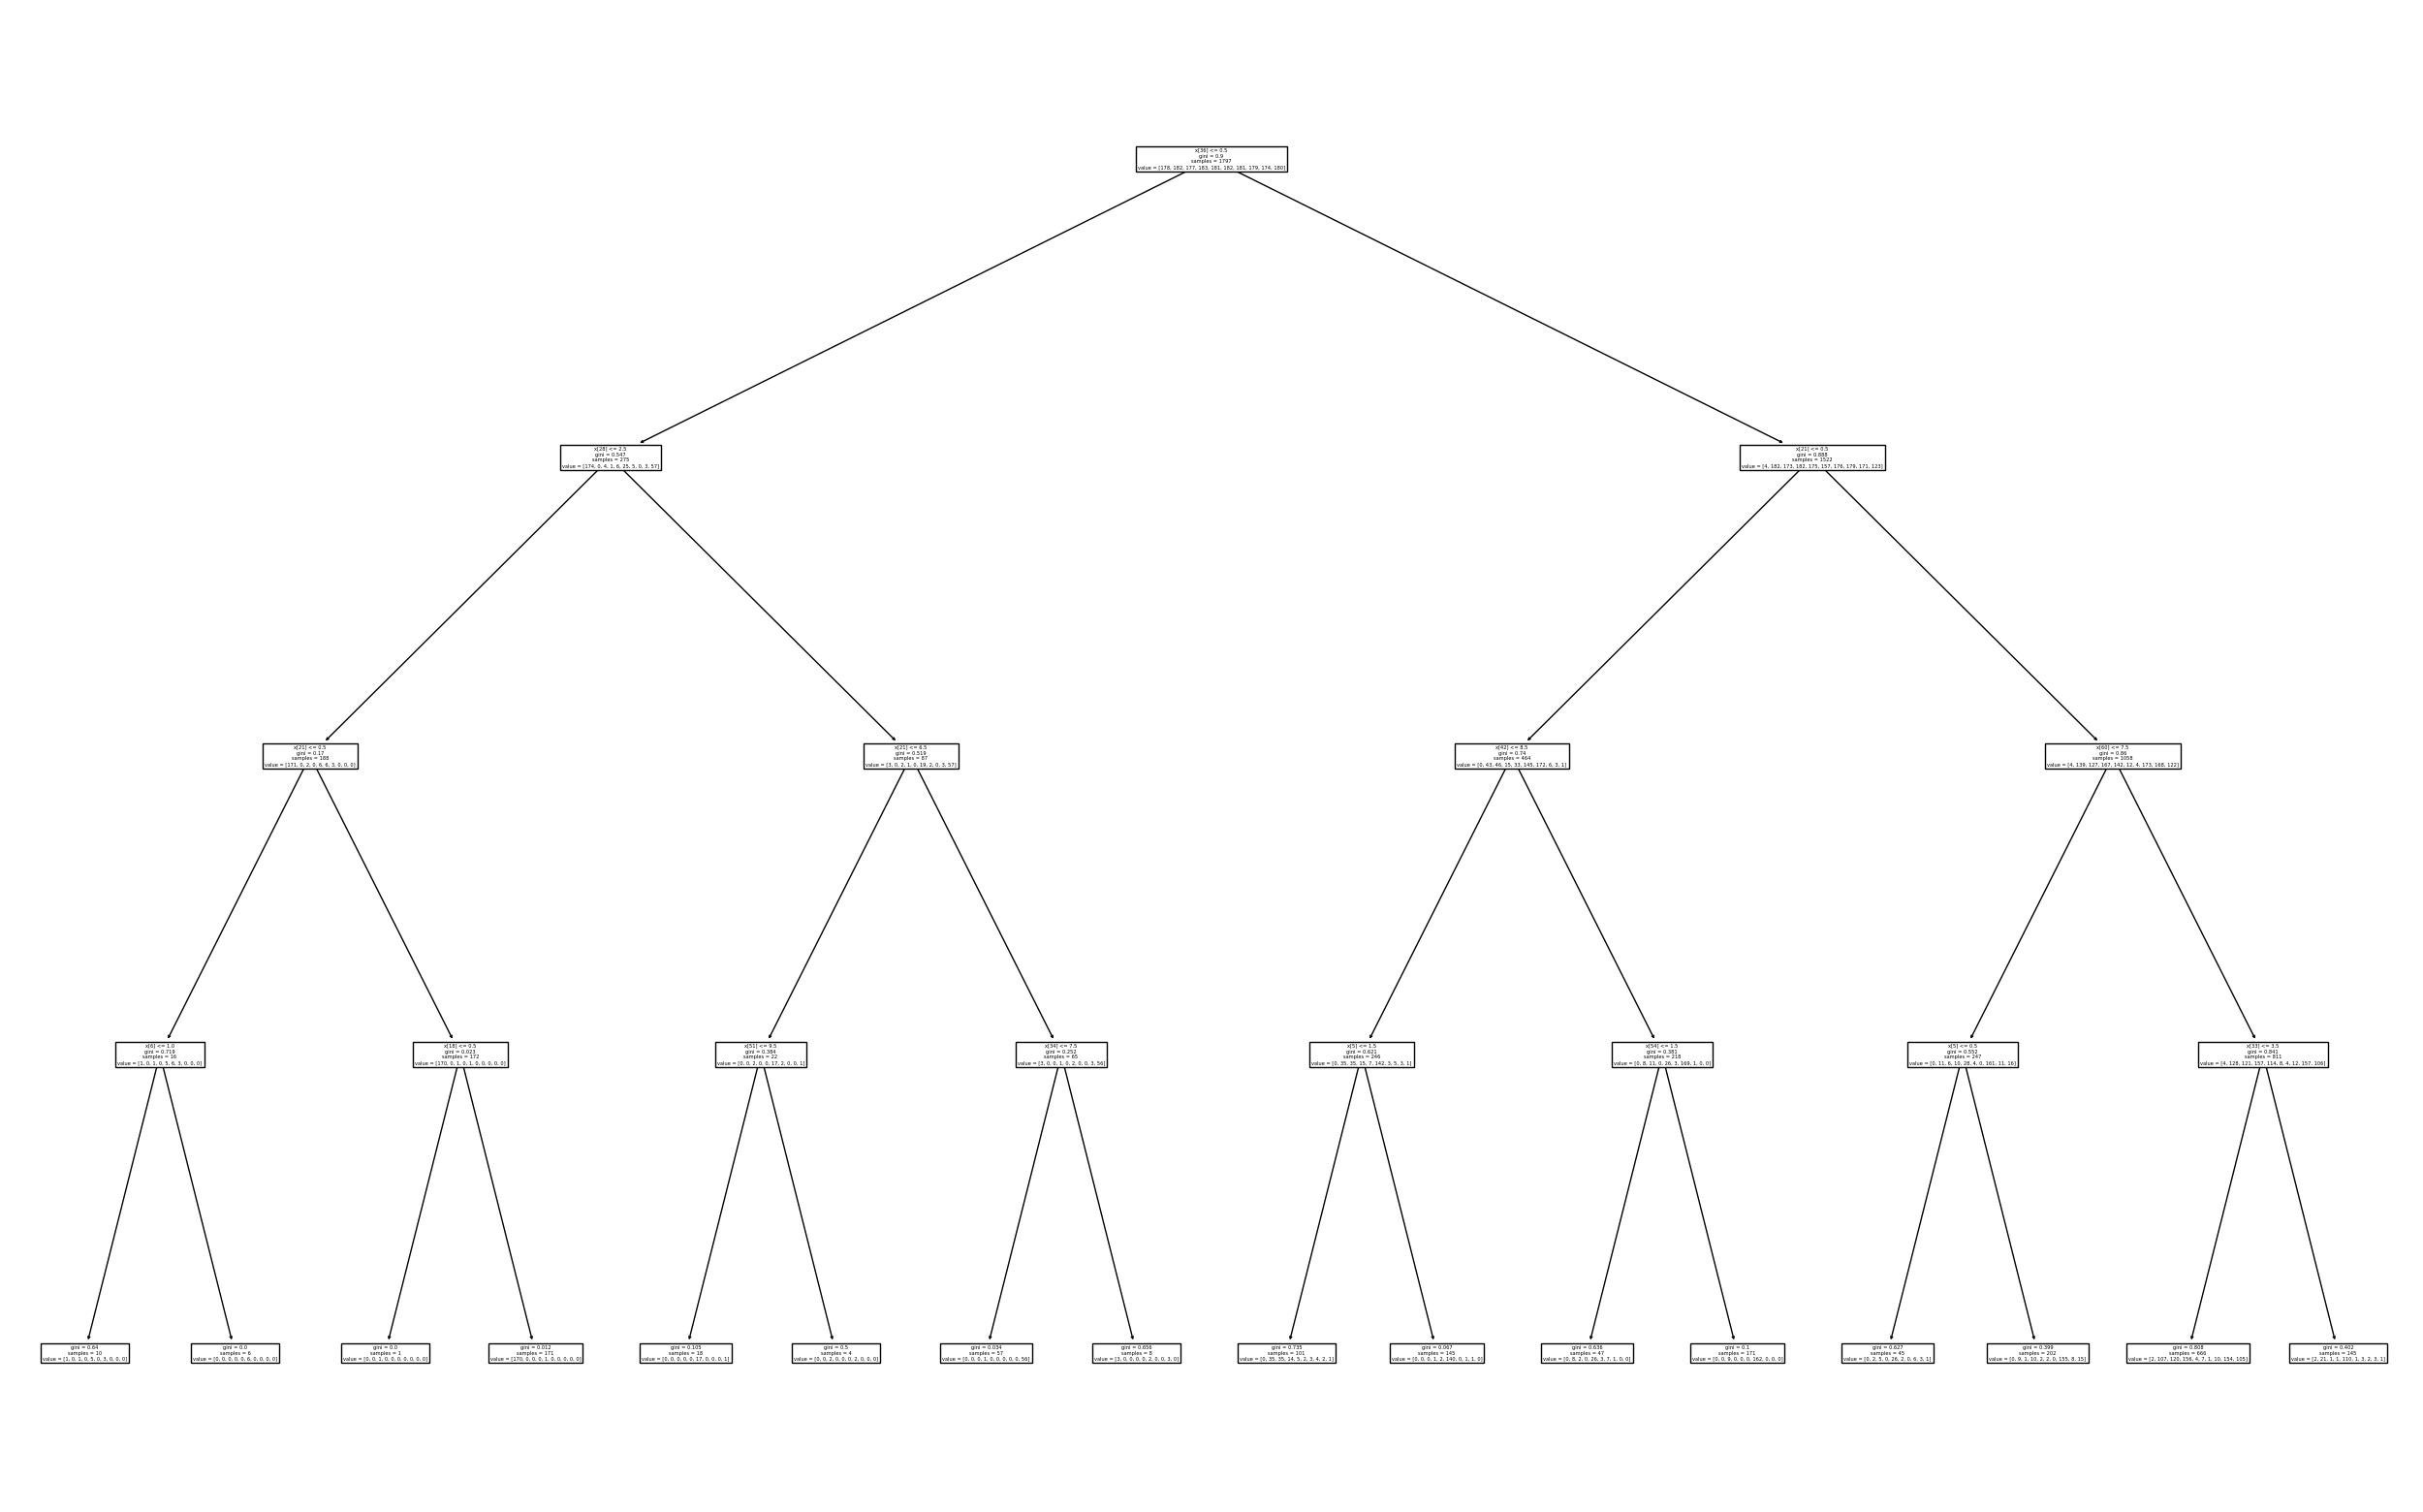

In [21]:
plt.figure(figsize=(32,20))
plot_tree(tree)
plt.show()

In [22]:
tree.tree_.max_depth

4

In [23]:
tree = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5)

In [24]:
tree.fit(attributes, targets)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=20)

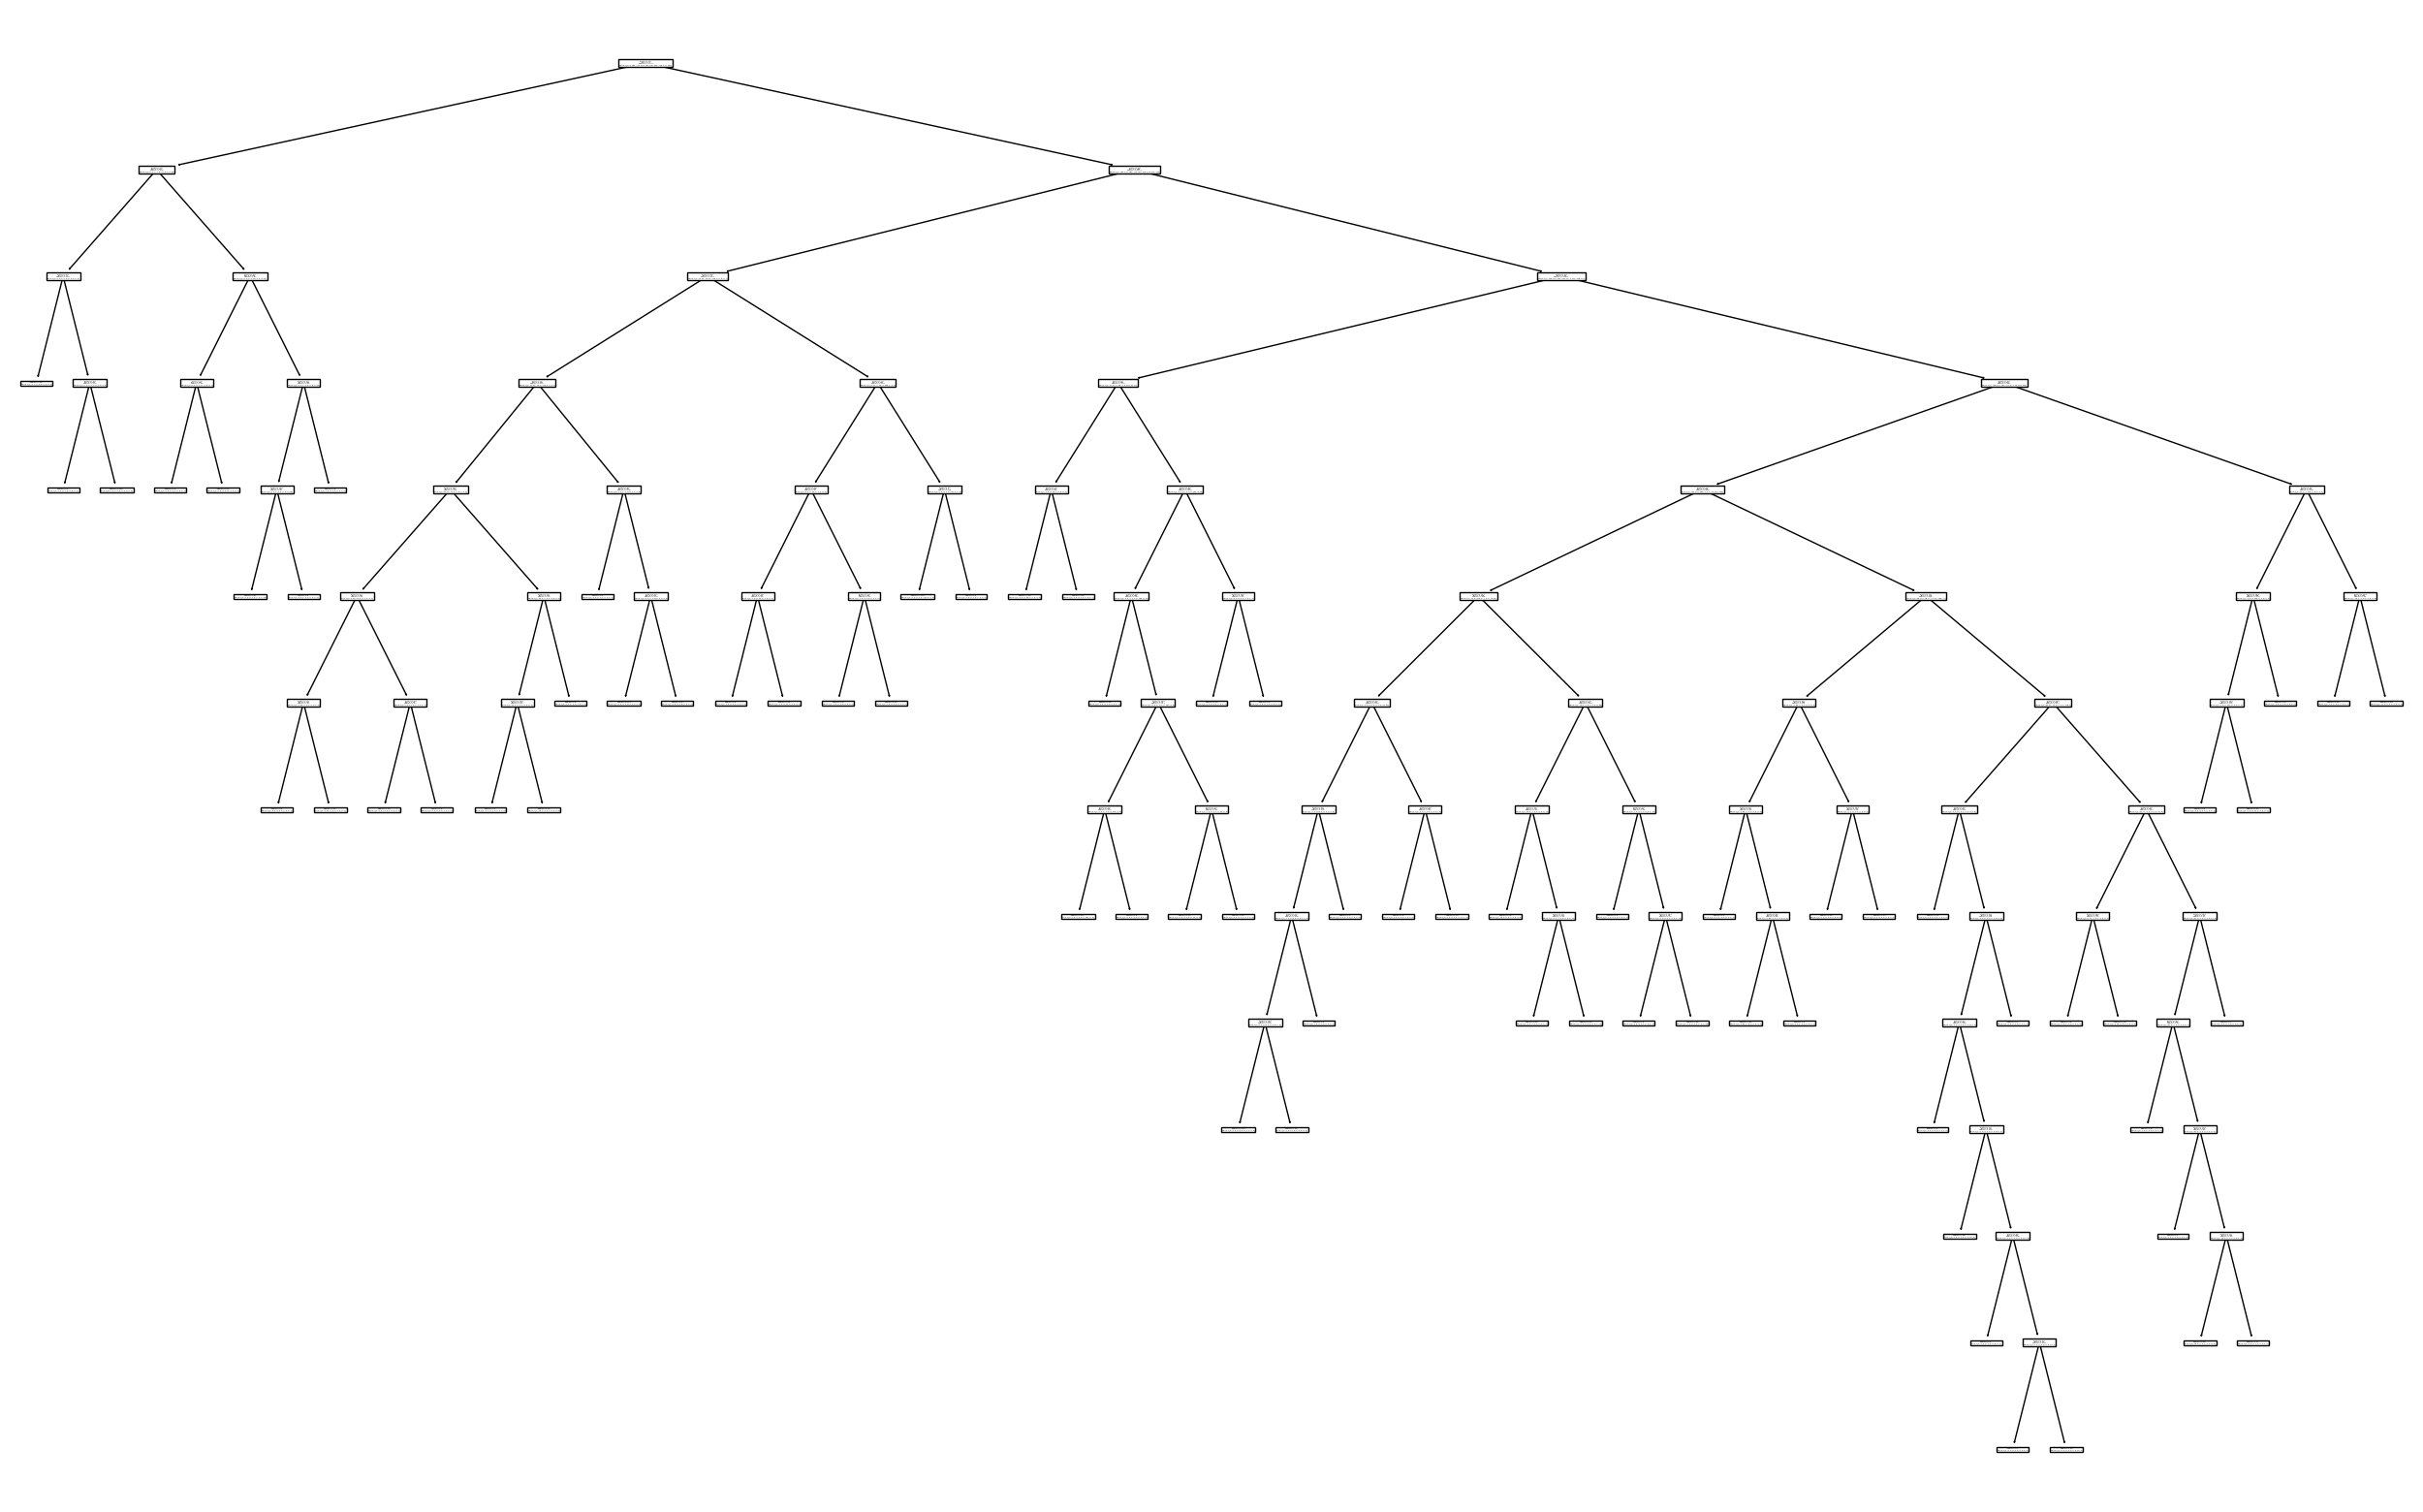

In [25]:
plt.figure(figsize=(32,20))
plot_tree(tree)
plt.show()

In [26]:
tree = DecisionTreeClassifier(min_samples_leaf=0.1)

In [27]:
tree.fit(attributes, targets)

DecisionTreeClassifier(min_samples_leaf=0.1)

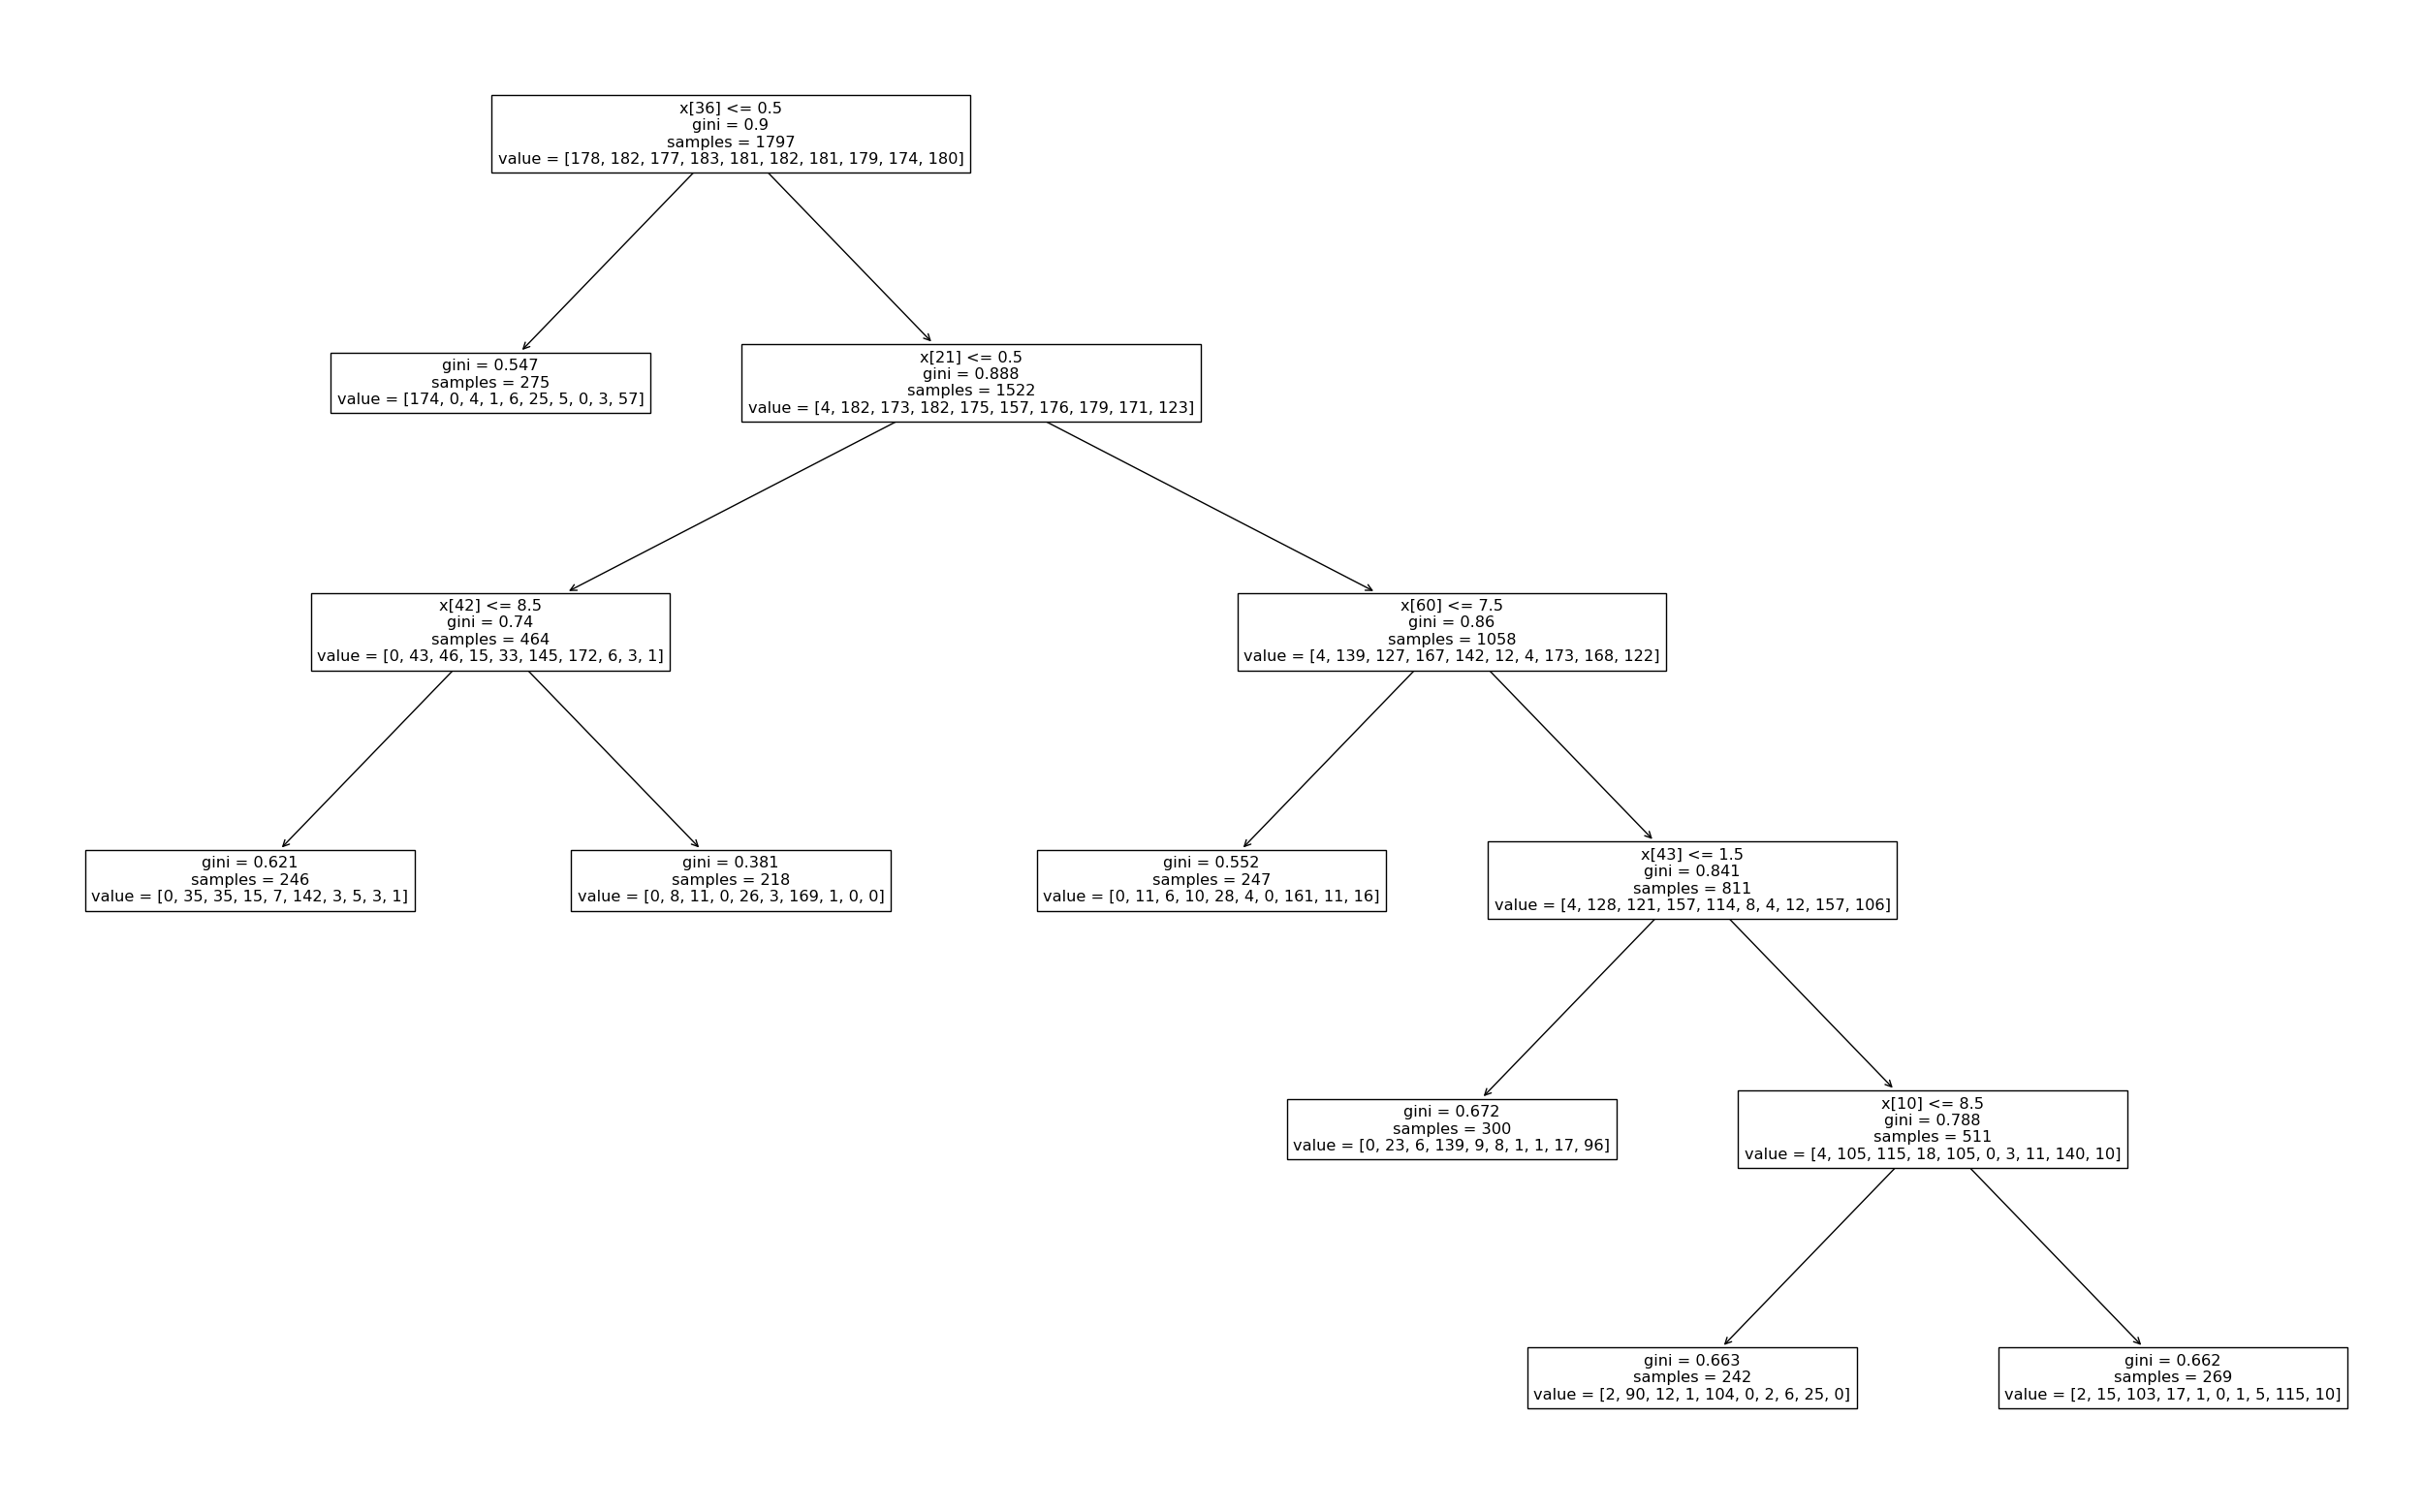

In [28]:
plt.figure(figsize=(32,20))
plot_tree(tree)
plt.show()

In [29]:
tree = DecisionTreeClassifier(min_samples_leaf=0.05)

In [30]:
tree.fit(attributes, targets)

DecisionTreeClassifier(min_samples_leaf=0.05)

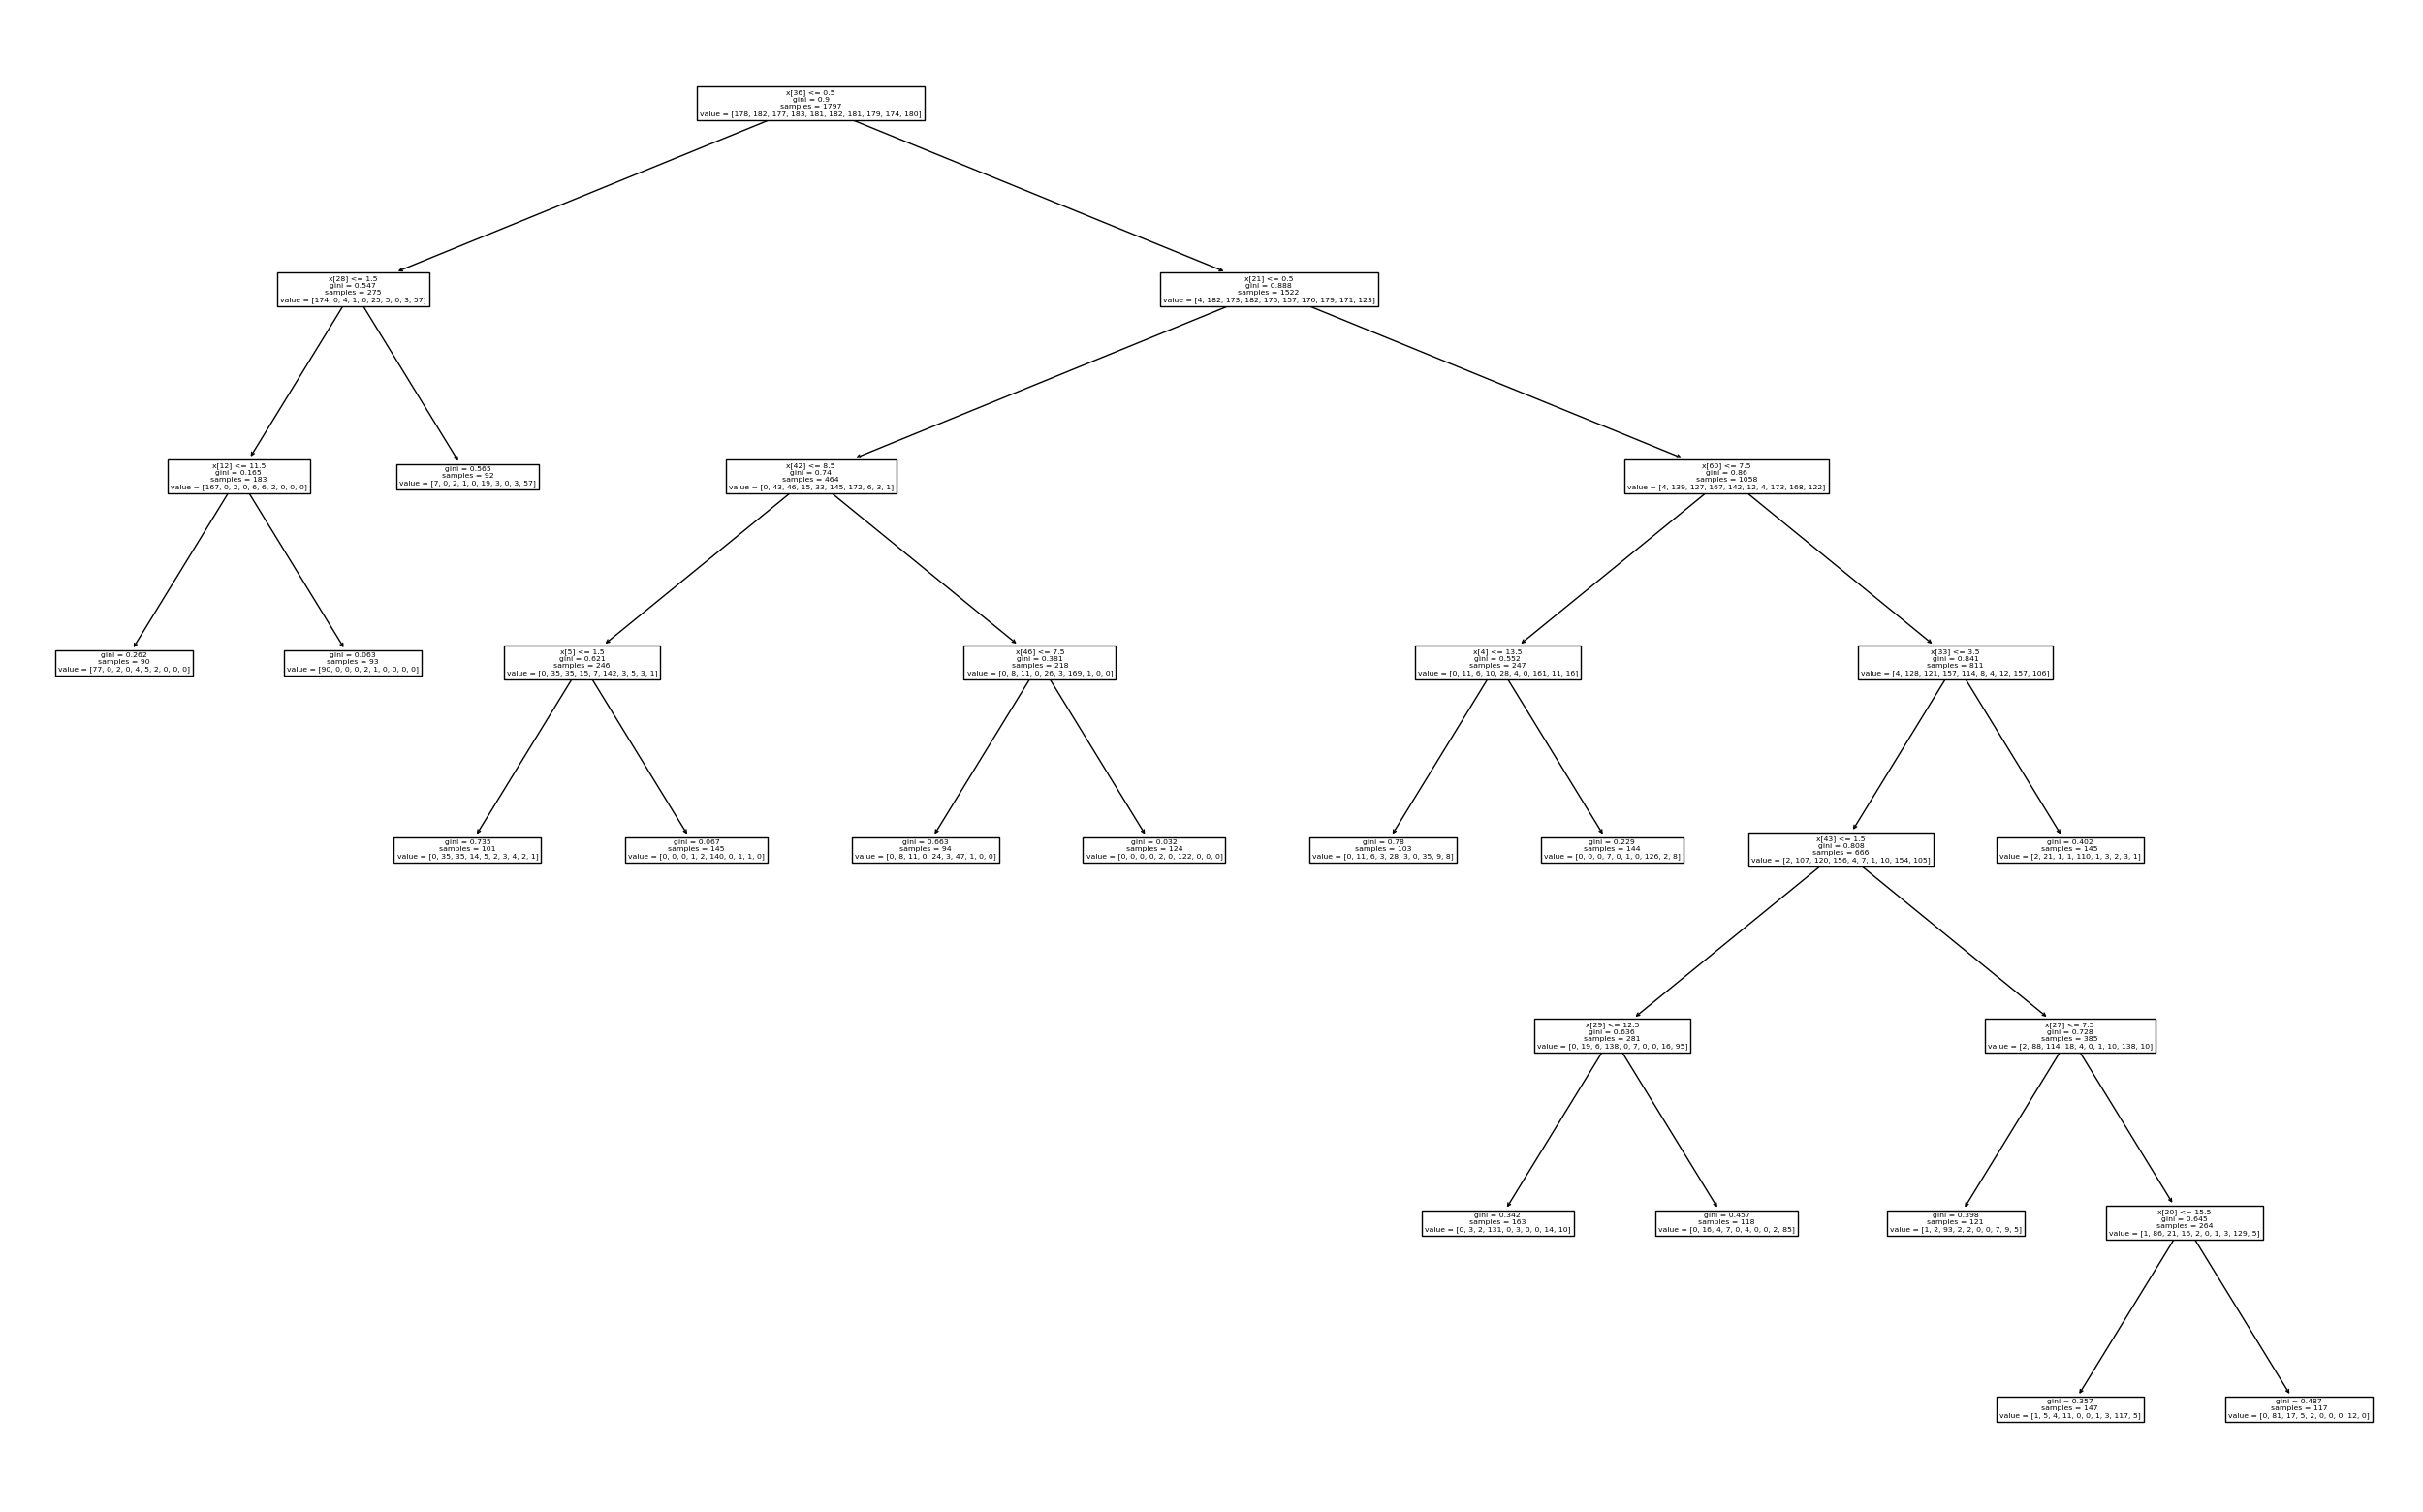

In [31]:
plt.figure(figsize=(32,20))
plot_tree(tree)
plt.show()

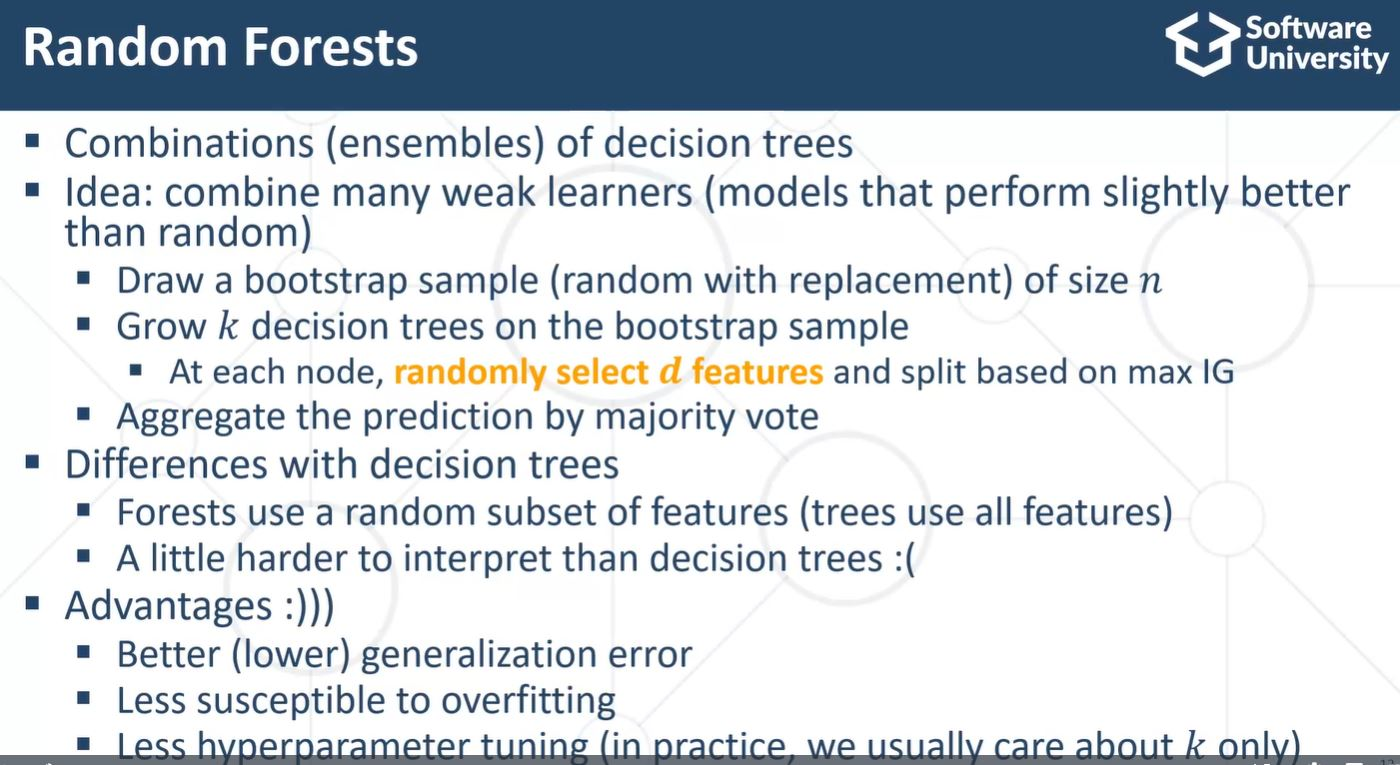

In [32]:
image_path = "images/03.JPG"
Image(filename=image_path)

In [33]:
forest = RandomForestClassifier()

In [34]:
forest.fit(attributes, targets)

RandomForestClassifier()

In [35]:
forest.estimator_

DecisionTreeClassifier()

In [36]:
forest.estimators_[0].tree_.max_depth

13

In [37]:
forest = RandomForestClassifier(n_estimators=7)

In [38]:
forest.fit(attributes, targets)

RandomForestClassifier(n_estimators=7)

In [39]:
forest.estimator_

DecisionTreeClassifier()

In [40]:
for estimator in forest.estimators_:
    print(estimator.tree_.max_depth)

14
16
14
14
14
13
14


In [41]:
forest.feature_importances_

array([0.        , 0.00334074, 0.02334782, 0.01272817, 0.00485058,
       0.01908814, 0.0067355 , 0.00030934, 0.        , 0.01700109,
       0.01981583, 0.00514521, 0.01501408, 0.03208502, 0.00698813,
       0.00130014, 0.        , 0.01057336, 0.03539896, 0.03247195,
       0.04204393, 0.05172086, 0.00469181, 0.00118732, 0.        ,
       0.01470743, 0.02613263, 0.02000204, 0.02652419, 0.01473587,
       0.03951725, 0.        , 0.        , 0.03948765, 0.01460587,
       0.01416196, 0.05084691, 0.01537003, 0.02740137, 0.        ,
       0.00026226, 0.01163837, 0.02515691, 0.04467337, 0.02404973,
       0.01174167, 0.02687359, 0.        , 0.        , 0.00190833,
       0.01757032, 0.01802519, 0.0143831 , 0.03009196, 0.02948016,
       0.00149725, 0.        , 0.00021226, 0.02727385, 0.00791836,
       0.02777482, 0.01453863, 0.01433428, 0.0012644 ])

In [42]:
list(zip(data["feature_names"], np.round(forest.feature_importances_, 3)))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.003),
 ('pixel_0_2', 0.023),
 ('pixel_0_3', 0.013),
 ('pixel_0_4', 0.005),
 ('pixel_0_5', 0.019),
 ('pixel_0_6', 0.007),
 ('pixel_0_7', 0.0),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.017),
 ('pixel_1_2', 0.02),
 ('pixel_1_3', 0.005),
 ('pixel_1_4', 0.015),
 ('pixel_1_5', 0.032),
 ('pixel_1_6', 0.007),
 ('pixel_1_7', 0.001),
 ('pixel_2_0', 0.0),
 ('pixel_2_1', 0.011),
 ('pixel_2_2', 0.035),
 ('pixel_2_3', 0.032),
 ('pixel_2_4', 0.042),
 ('pixel_2_5', 0.052),
 ('pixel_2_6', 0.005),
 ('pixel_2_7', 0.001),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.015),
 ('pixel_3_2', 0.026),
 ('pixel_3_3', 0.02),
 ('pixel_3_4', 0.027),
 ('pixel_3_5', 0.015),
 ('pixel_3_6', 0.04),
 ('pixel_3_7', 0.0),
 ('pixel_4_0', 0.0),
 ('pixel_4_1', 0.039),
 ('pixel_4_2', 0.015),
 ('pixel_4_3', 0.014),
 ('pixel_4_4', 0.051),
 ('pixel_4_5', 0.015),
 ('pixel_4_6', 0.027),
 ('pixel_4_7', 0.0),
 ('pixel_5_0', 0.0),
 ('pixel_5_1', 0.012),
 ('pixel_5_2', 0.025),
 ('pixel_5_3', 0.045),
 ('pixel_

In [43]:
forest.feature_importances_.sum()

1.0

In [44]:
permutation_importance(forest, attributes, targets)["importances_mean"]

array([0.        , 0.        , 0.00378408, 0.00189204, 0.00122426,
       0.00345019, 0.00066778, 0.        , 0.        , 0.00767947,
       0.0033389 , 0.00077908, 0.00122426, 0.01202003, 0.00022259,
       0.        , 0.        , 0.00100167, 0.01446856, 0.01469115,
       0.01502504, 0.03817474, 0.        , 0.        , 0.        ,
       0.00155815, 0.00578742, 0.00345019, 0.00356149, 0.00244853,
       0.01291041, 0.        , 0.        , 0.01235392, 0.00478575,
       0.00601002, 0.02415136, 0.00077908, 0.01502504, 0.        ,
       0.        , 0.00122426, 0.00422927, 0.03049527, 0.00267112,
       0.00100167, 0.00411797, 0.        , 0.        , 0.00055648,
       0.00445186, 0.00133556, 0.00122426, 0.00756817, 0.00255982,
       0.        , 0.        , 0.        , 0.00511964, 0.00044519,
       0.00300501, 0.00267112, 0.00122426, 0.        ])

In [45]:
list(zip(data["feature_names"], np.round(permutation_importance(forest, attributes, targets)["importances_mean"], 3)))

[('pixel_0_0', 0.0),
 ('pixel_0_1', 0.0),
 ('pixel_0_2', 0.003),
 ('pixel_0_3', 0.002),
 ('pixel_0_4', 0.001),
 ('pixel_0_5', 0.003),
 ('pixel_0_6', 0.001),
 ('pixel_0_7', 0.0),
 ('pixel_1_0', 0.0),
 ('pixel_1_1', 0.006),
 ('pixel_1_2', 0.004),
 ('pixel_1_3', 0.001),
 ('pixel_1_4', 0.001),
 ('pixel_1_5', 0.011),
 ('pixel_1_6', 0.0),
 ('pixel_1_7', 0.0),
 ('pixel_2_0', 0.0),
 ('pixel_2_1', 0.001),
 ('pixel_2_2', 0.013),
 ('pixel_2_3', 0.015),
 ('pixel_2_4', 0.014),
 ('pixel_2_5', 0.041),
 ('pixel_2_6', 0.0),
 ('pixel_2_7', 0.0),
 ('pixel_3_0', 0.0),
 ('pixel_3_1', 0.002),
 ('pixel_3_2', 0.004),
 ('pixel_3_3', 0.004),
 ('pixel_3_4', 0.004),
 ('pixel_3_5', 0.003),
 ('pixel_3_6', 0.015),
 ('pixel_3_7', 0.0),
 ('pixel_4_0', 0.0),
 ('pixel_4_1', 0.012),
 ('pixel_4_2', 0.004),
 ('pixel_4_3', 0.005),
 ('pixel_4_4', 0.022),
 ('pixel_4_5', 0.001),
 ('pixel_4_6', 0.015),
 ('pixel_4_7', 0.0),
 ('pixel_5_0', 0.0),
 ('pixel_5_1', 0.002),
 ('pixel_5_2', 0.004),
 ('pixel_5_3', 0.031),
 ('pixel_5_4', 0

In [46]:
pd.DataFrame(list(zip(data["feature_names"], np.round(permutation_importance(forest, attributes, targets)["importances_mean"], 3)))).sort_values(1, ascending=False)

,0,1
21,pixel_2_5,0.038
43,pixel_5_3,0.031
36,pixel_4_4,0.025
20,pixel_2_4,0.015
19,pixel_2_3,0.015
...,...,...
15,pixel_1_7,0.000
14,pixel_1_6,0.000
8,pixel_1_0,0.000
7,pixel_0_7,0.000


In [47]:
xgb = XGBClassifier() #extreem overfitting!

In [48]:
xgb.fit(attributes, targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)